In [1]:
import healpy as hp

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pymaster as nmt

In [4]:
NSIDE = 512
lmax = 2*NSIDE

In [5]:
output_noise = 'noise_28scan'


In [6]:
mode_list = ['T','E','B']

In [7]:
2*mode_list[0]

'TT'

In [8]:
aposcale = .1

In [9]:
noise_destriping= hp.read_map(output_noise+"/MapMaker_map.fits", dtype = float,field = None)
noise_rcond= hp.read_map(output_noise+"/MapMaker_rcond.fits", dtype = float,field = None)
noise_filt= hp.read_map(output_noise+"/FilterBin_filtered_map.fits", dtype = float,field = None)
noise_rcond= hp.read_map(output_noise+"/FilterBin_rcond.fits", dtype = float,field = None)

In [10]:
noise_GC512 = hp.read_map('noise_030_GC_nside.FITS',field=None)

In [11]:
mask_noise = np.zeros(noise_rcond.shape)
mask_noise[noise_rcond>1e-3]=1

In [12]:
#mask_noise_Sm = nmt.mask_apodization(mask_noise, aposcale, apotype="Smooth")
mask_noise_Sm = mask_noise

In [13]:
noise_mask = np.zeros(noise_GC512.shape)
noise_mask[:,:] = noise_GC512[:,:]
noise_mask[:,mask_noise_Sm==0] = hp.UNSEEN

In [14]:
noise_destriping[:,mask_noise_Sm==0] = hp.UNSEEN

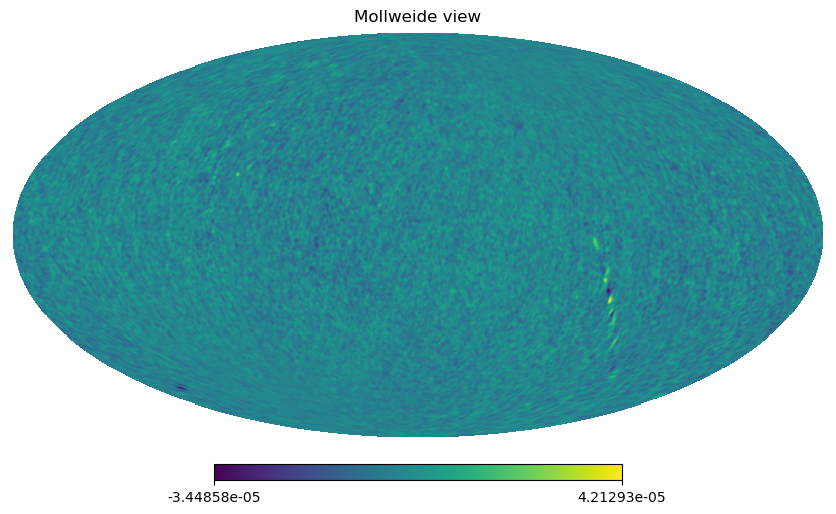

In [15]:
hp.mollview(noise_GC512[1])

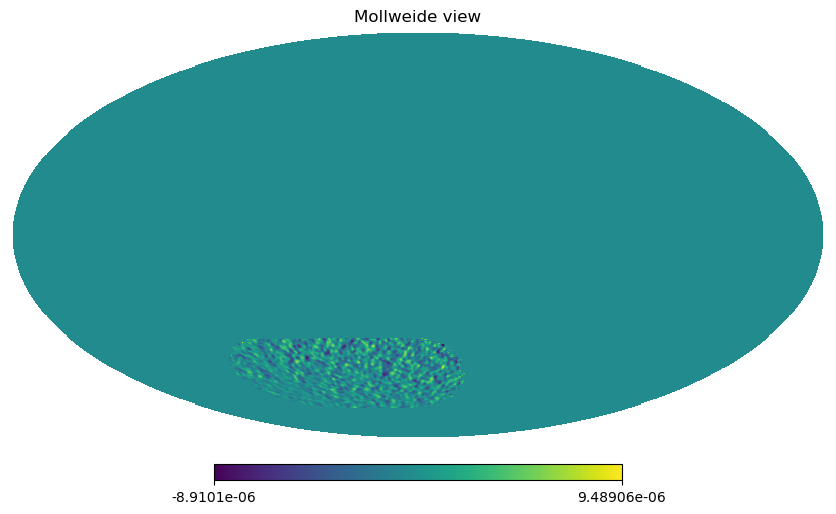

In [16]:
hp.mollview(noise_filt[1])

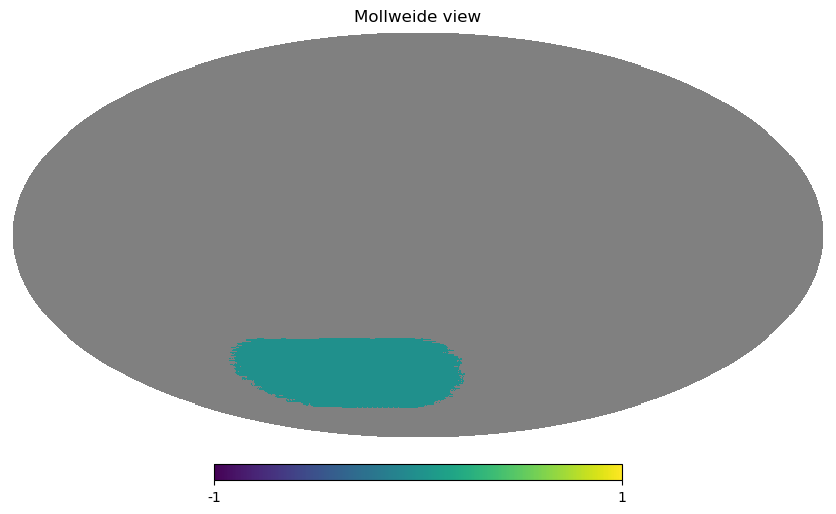

In [17]:
hp.mollview((noise_mask-noise_GC512)[1])

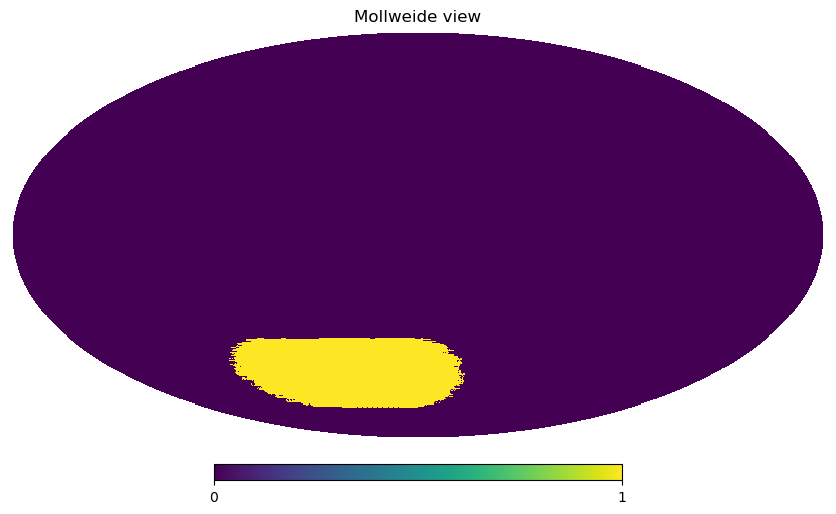

In [18]:
hp.mollview(mask_noise_Sm)

In [19]:
noise_filt[:,mask_noise_Sm==0] = hp.UNSEEN

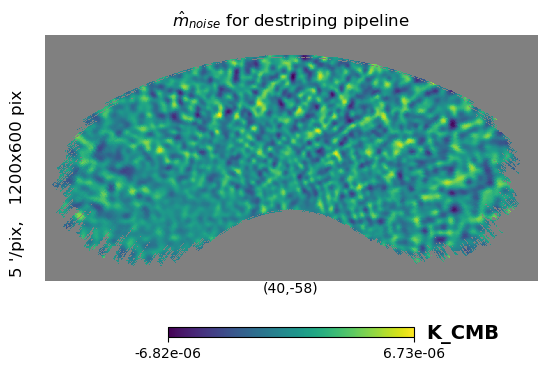

In [20]:
hp.gnomview(noise_filt[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{noise}$ for destriping pipeline', unit='K_CMB')

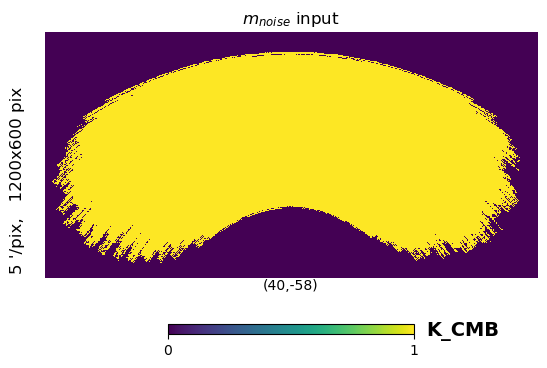

In [22]:
hp.gnomview(mask_noise_Sm,rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '${m}_{noise}$ input', unit='K_CMB')

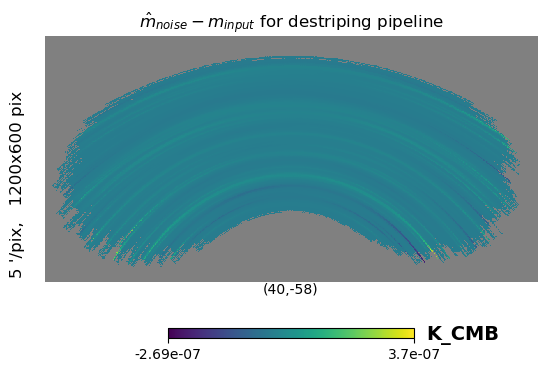

In [23]:
diff_map = noise_destriping-noise_mask
diff_map[:,mask_noise_Sm==0] = hp.UNSEEN
hp.gnomview(diff_map[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{noise}-m_{input}$ for destriping pipeline', unit='K_CMB')

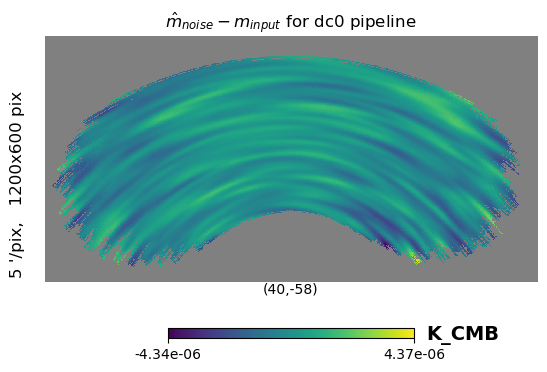

In [24]:
diff_map_filt = noise_filt-noise_mask
diff_map_filt[:,mask_noise_Sm==0] = hp.UNSEEN
hp.gnomview(diff_map_filt[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{noise}-m_{input}$ for dc0 pipeline', unit='K_CMB')

In [25]:
def D_ell(maps, lmax, use_pixel_weights=False):
    l_arr = np.arange(0,lmax+1)
    cl_s = hp.anafast(maps, lmax=lmax,use_pixel_weights=use_pixel_weights)
    return (cl_s[:]*l_arr*(l_arr+1)/(2*np.pi))

In [33]:
Dl_in_noise = D_ell(maps=noise_mask,lmax=lmax,use_pixel_weights=False)
Dl_out_noise_filt = D_ell(maps=noise_filt,lmax=lmax)
Dl_out_noise = D_ell(maps=noise_destriping,lmax=lmax)
Dl_diff1_noise = D_ell(maps=diff_map,lmax=lmax)
Dl_diff2_noise = D_ell(maps=diff_map_filt,lmax=lmax)

In [28]:
Dl_noise_nomask = D_ell(maps=noise_GC512,lmax=lmax,use_pixel_weights=False)

In [29]:
hit_mask_noise = np.array(np.where(mask_noise_Sm<=0))[0]
sky_fraction1 = 1-(len(hit_mask_noise) / len(mask_noise))
print(f"The map covers {sky_fraction1:.1%} of the sky")

The map covers 5.3% of the sky


In [30]:
l_arr = np.arange(0,lmax+1)

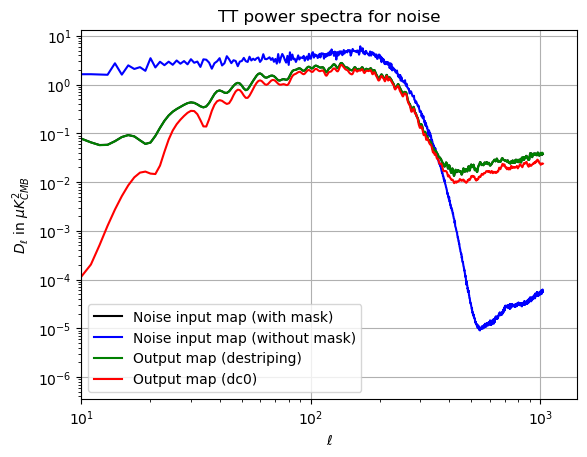

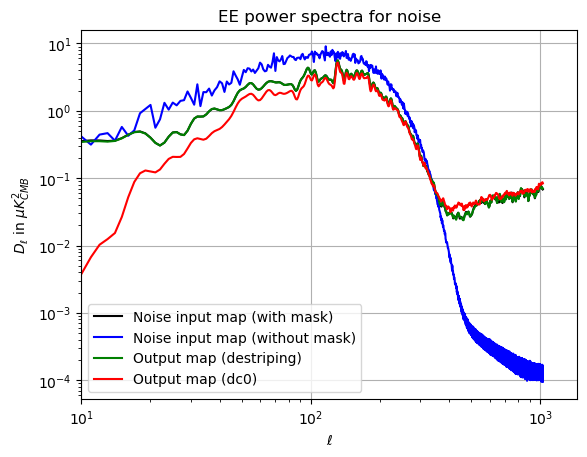

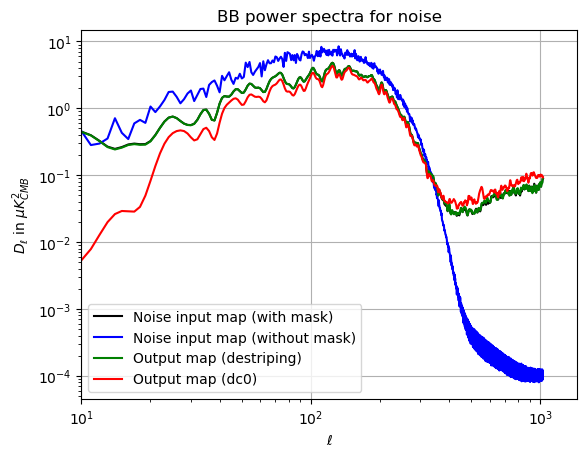

In [38]:
for i in range(3):
    plt.plot(l_arr,Dl_in_noise[i]*1e12/sky_fraction1, 'k-', label = r'Noise input map (with mask)')
    plt.plot(l_arr,Dl_noise_nomask[i]*1e12, 'b-', label = r'Noise input map (without mask)')
    plt.plot(l_arr,Dl_out_noise[i]*1e12/sky_fraction1, 'g-', label = r'Output map (destriping)')
    plt.plot(l_arr,Dl_out_noise_filt[i]*1e12/sky_fraction1, 'r-', label = r'Output map (dc0)')

    #plt.plot(l_arr,Dl_diff_noise[i]*1e12/sky_fraction, 'r.', label = r'Residual map')
    plt.xlabel('$\ell$')
    plt.ylabel('$D_{\ell}$ in $\mu K_{CMB}^2$')
    plt.legend(loc = 'lower left')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(2*mode_list[i]+' power spectra for noise')
    plt.xlim(left = 10)
    plt.grid()
    plt.savefig(output_noise+'/cls_comparison'+2*mode_list[i],format = 'svg')
    plt.show()

In [39]:
output_sky = 'cmb_28scan'

In [40]:
#hitmap_noise = hp.read_map(output_sky+"/MapMaker_hits.fits", dtype = float,field = None)
sky_destriping= hp.read_map(output_sky+"/MapMaker_map.fits", dtype = float,field = None)
sky_rcond= hp.read_map(output_sky+"/MapMaker_rcond.fits", dtype = float,field = None)
sky_filt= hp.read_map(output_sky+"/FilterBin_filtered_map.fits", dtype = float,field = None)
sky_rcond_filt= hp.read_map(output_sky+"/FilterBin_rcond.fits", dtype = float,field = None)

In [5]:
sky_GC512 = hp.read_map('cmb_030_GC_nside.FITS',field=None)

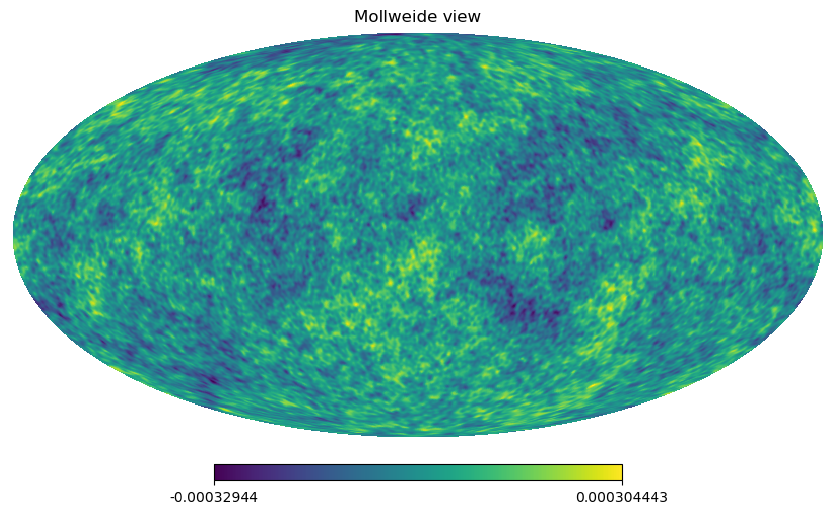

In [6]:
hp.mollview(sky_GC512[0])

In [43]:
mask_sky_bin = np.zeros(sky_rcond.shape)
mask_sky_bin[sky_rcond>1e-3]=1
mask_sky = nmt.mask_apodization(mask_sky_bin, aposcale, apotype="Smooth")

In [44]:
mask_sky_filt = np.zeros(sky_rcond.shape)
mask_sky_filt[sky_rcond_filt>1e-3]=1
mask_sky2 = nmt.mask_apodization(mask_sky_filt, aposcale, apotype="Smooth")

/tmp/ipykernel_2129022/1268631636.py:3: RuntimeWarning: divide by zero encountered in log10
  hp.gnomview(np.log10(np.abs(mask_sky-mask_sky2)),rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = 'Apodized mask difference', unit='K_CMB')


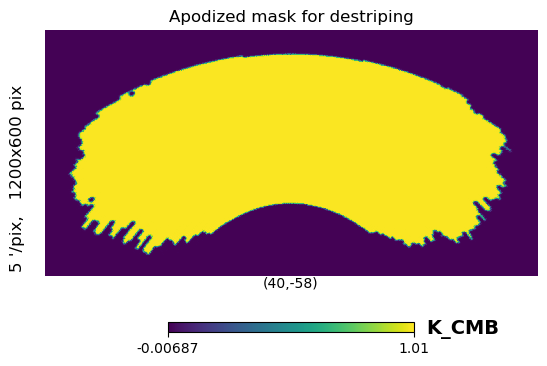

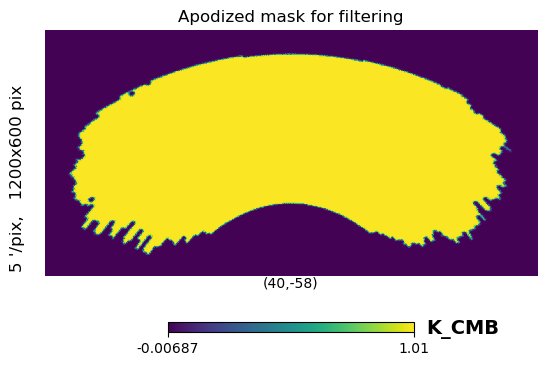

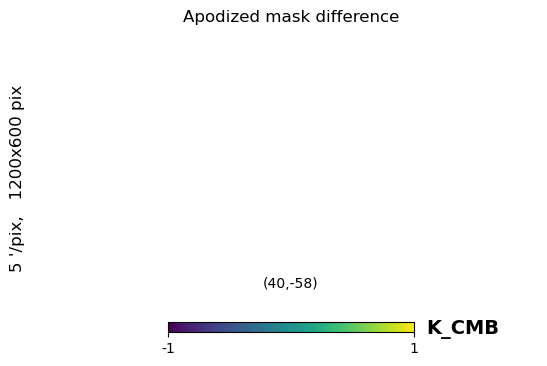

In [45]:
hp.gnomview(mask_sky,rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = 'Apodized mask for destriping', unit='K_CMB')
hp.gnomview(mask_sky2,rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = 'Apodized mask for filtering', unit='K_CMB')
hp.gnomview(np.log10(np.abs(mask_sky-mask_sky2)),rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = 'Apodized mask difference', unit='K_CMB')

In [46]:
sky_mask = np.zeros(sky_GC512.shape)
sky_mask[:,:] = sky_GC512[:,:]
sky_mask[:,mask_sky==0] = hp.UNSEEN

In [47]:
sky_destriping[:,mask_sky==0] = hp.UNSEEN

In [48]:
sky_filt[:,mask_sky==0] = hp.UNSEEN

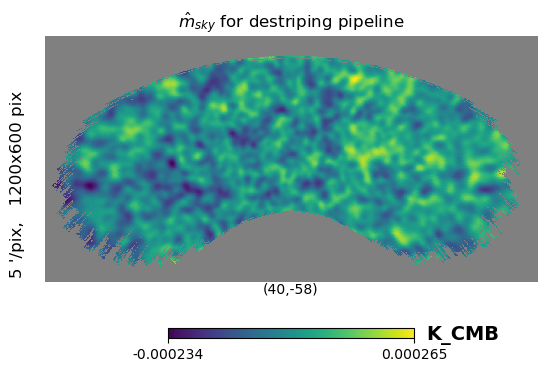

In [49]:
hp.gnomview(sky_destriping[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{sky}$ for destriping pipeline', unit='K_CMB')

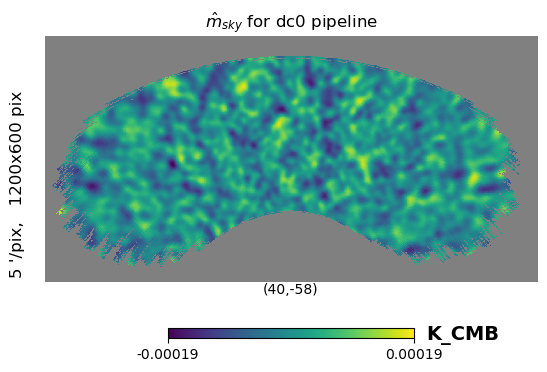

In [50]:
hp.gnomview(sky_filt[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{sky}$ for dc0 pipeline', unit='K_CMB')

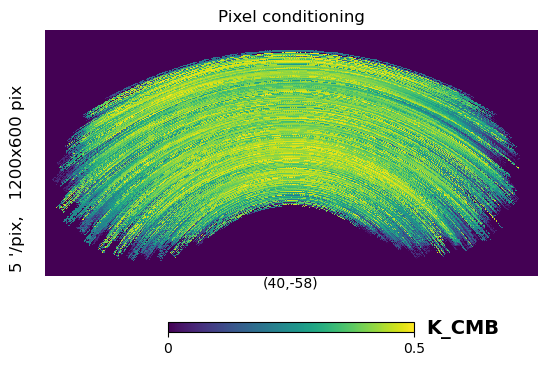

In [51]:
hp.gnomview(sky_rcond,rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = 'Pixel conditioning', unit='K_CMB')

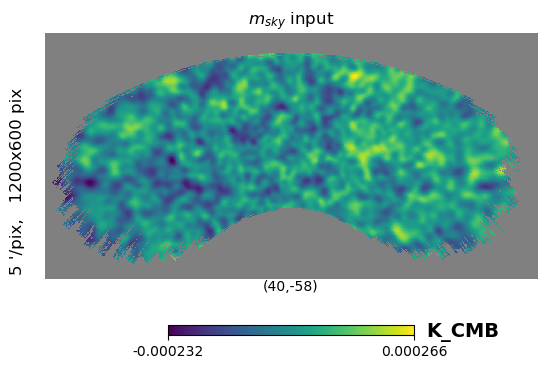

In [52]:
hp.gnomview(sky_mask[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '${m}_{sky}$ input', unit='K_CMB')

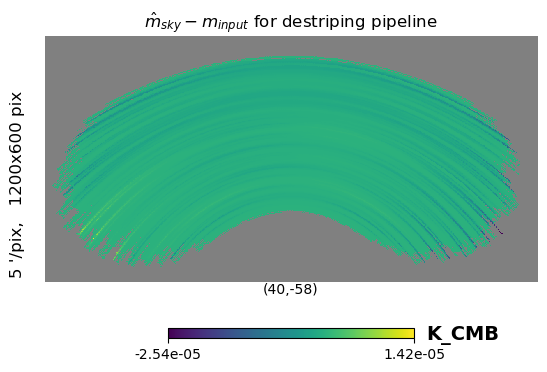

In [53]:
diff_map = sky_destriping-sky_mask
diff_map[:,mask_sky==0] = hp.UNSEEN
hp.gnomview(diff_map[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{sky}-m_{input}$ for destriping pipeline', unit='K_CMB')

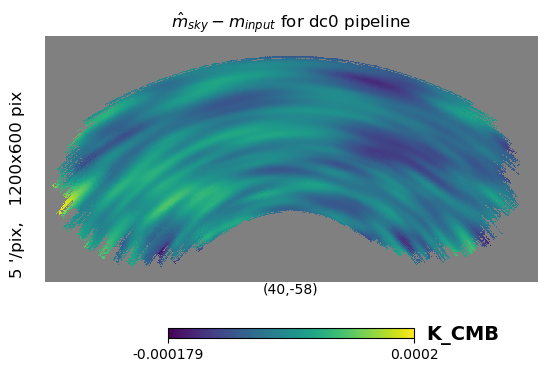

In [54]:
diff_map2 = sky_filt-sky_mask
diff_map2[:,mask_sky==0] = hp.UNSEEN
hp.gnomview(diff_map2[0],rot = (40,-58),xsize = 1200,ysize=600,reso = 5, title = '$\hat{m}_{sky}-m_{input}$ for dc0 pipeline', unit='K_CMB')

In [55]:
Dl_in_sky = D_ell(maps=sky_mask,lmax=lmax,use_pixel_weights=False)
Dl_out_sky = D_ell(maps=sky_destriping,lmax=lmax)
Dl_diff_sky = D_ell(maps=diff_map,lmax=lmax)
Dl_out_skyfilt = D_ell(maps=sky_filt,lmax=lmax)
Dl_diff_skyfilt = D_ell(maps=diff_map2,lmax=lmax)

In [56]:
Dl_sky_nomask = D_ell(maps=sky_GC512,lmax=lmax,use_pixel_weights=False)

In [57]:
hit_mask = np.array(np.where(mask_sky<=0))[0]
sky_fraction2 = 1-(len(hit_mask) / len(mask_sky))
print(f"The map covers {sky_fraction2:.1%} of the sky")

The map covers 5.2% of the sky


In [58]:
l_arr = np.arange(0,lmax+1)

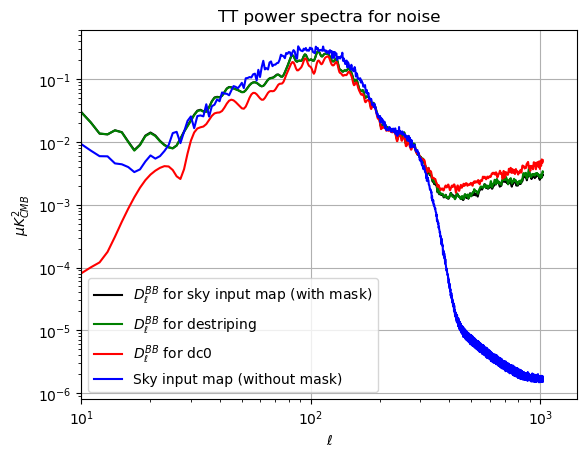

In [62]:
plt.plot(l_arr,Dl_in_sky[2]*1e12/sky_fraction2, 'k-', label = r'$D_{\ell}^{BB}$ for sky input map (with mask)')
plt.plot(l_arr,Dl_out_sky[2]*1e12/sky_fraction2, 'g-', label = r'$D_{\ell}^{BB}$ for destriping')
plt.plot(l_arr,Dl_out_skyfilt[2]*1e12/sky_fraction2, 'r-', label = r'$D_{\ell}^{BB}$ for dc0')
#
plt.plot(l_arr,Dl_sky_nomask[2]*1e12, 'b-', label = r'Sky input map (without mask)')

#plt.plot(l_arr,Dl_diff_sky[0]*1e12/sky_fraction2, 'r.', label = r'$D_{\ell}^{BB}$ for sky residual map')

plt.xlabel('$\ell$')
plt.ylabel('$\mu K_{CMB}^2$')
plt.legend(loc = 'lower left')
plt.xscale('log')
plt.yscale('log')
plt.title('TT power spectra for noise')
plt.xlim(left = 10)
plt.grid()
#plt.savefig(output_sky+'/cls_comparison',format = 'svg')
plt.show()

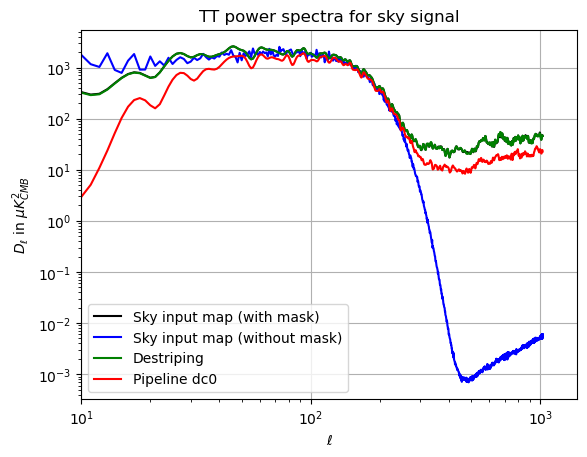

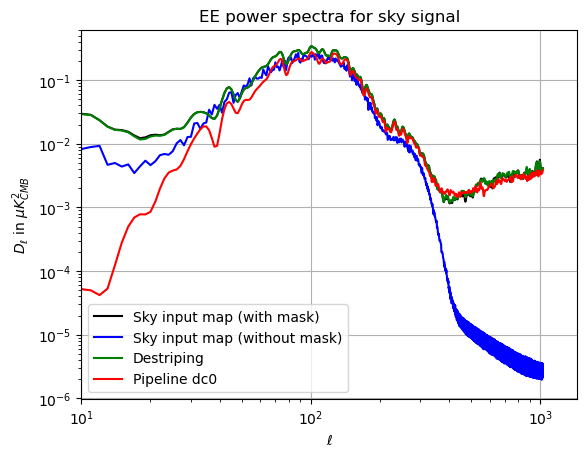

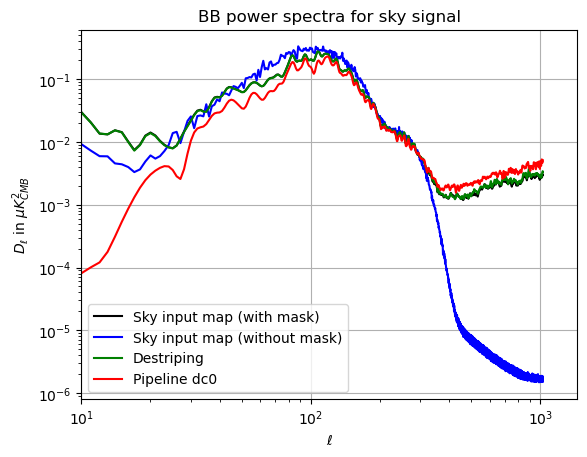

In [64]:
for i in range(3):
    plt.plot(l_arr,Dl_in_sky[i]*1e12/sky_fraction2, 'k-', label = r'Sky input map (with mask)')
    plt.plot(l_arr,Dl_sky_nomask[i]*1e12, 'b-', label = r'Sky input map (without mask)')
    plt.plot(l_arr,Dl_out_sky[i]*1e12/sky_fraction2, 'g-', label = r'Destriping')
    plt.plot(l_arr,Dl_out_skyfilt[i]*1e12/sky_fraction2, 'r-', label = r'Pipeline dc0')
    #
    plt.xlabel('$\ell$')
    plt.ylabel('$D_{\ell}$ in $\mu K_{CMB}^2$')
    plt.legend(loc = 'lower left')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(2*mode_list[i]+' power spectra for sky signal')
    plt.xlim(left = 10)
    plt.grid()
    plt.savefig(output_sky+'/cls_comparison'+2*mode_list[i],format = 'svg')
    plt.show()